In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [5]:
ag = pd.read_csv("~/Desktop/Datasets/AG_Classical.csv", encoding='latin1')
for index, row in ag.iterrows():
    if row['Res'] == "Jan-00":
        ag.at[index, 'Res'] = "1-0"

ag.head()

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs
0,2/25/2023,"Duda, Jan-Krzysztof","Giri, Anish",2750,2771,2760,WR Chess Masters 2023,Dusseldorf GER,D10,"Slav Defense, General",9.4,½-½,30
1,2/23/2023,"Keymer, Vincent","Giri, Anish",2655,2771,2713,WR Chess Masters 2023,Dusseldorf GER,A20,"English Opening, King's English Variation, Gen...",7.4,½-½,39
2,2/21/2023,"Aronian, Levon","Giri, Anish",2785,2771,2778,WR Chess Masters 2023,Dusseldorf GER,C67,"Spanish Game, Berlin Defense, Rio Gambit Accepted",5.1,1-0,48
3,2/19/2023,"Giri, Anish","Esipenko, Andrey",2771,2723,2747,WR Chess Masters 2023,Dusseldorf GER,A45,"Indian Game, General",4.5,½-½,33
4,2/18/2023,"Nepomniachtchi, Ian","Giri, Anish",2773,2771,2772,WR Chess Masters 2023,Dusseldorf GER,A28,"English Opening, King's English Variation, Fou...",3.3,½-½,37


In [6]:
len(ag)

252

In [7]:
print(ag.isnull().sum())

Date       0
White      0
Black      0
W ELO      0
B ELO      0
Av ELO     0
Event      0
Site       0
ECO        0
Opening    0
Round      0
Res        0
Mvs        0
dtype: int64


In [8]:
ag = ag[::-1]
ag.head()

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs
251,7/23/2012,"Morozevich, Alexander","Giri, Anish",2770,2696,2733,45th Biel GM,Biel SUI,D97,"Gruenfeld Defense, Russian Variation, With e4",1.0,0-1,50
250,7/24/2012,"Nakamura, Hikaru","Giri, Anish",2778,2696,2737,45th Biel GM,Biel SUI,D02,"Queen Pawn Game, Symmetrical Variation",2.0,½-½,41
249,7/25/2012,"Giri, Anish","Bacrot, Etienne",2696,2713,2704,45th Biel GM,Biel SUI,E97,"King's Indian Defense, Orthodox Variation, Bay...",3.0,1-0,37
248,7/26/2012,"Giri, Anish","Wang, Hao",2696,2739,2717,45th Biel GM,Biel SUI,E83,"King's Indian Defense, Saemisch Variation, Pan...",4.0,0-1,57
247,7/27/2012,"Carlsen, Magnus","Giri, Anish",2837,2696,2766,45th Biel GM,Biel SUI,C42,"Russian Game, French Attack",5.0,½-½,49


In [9]:
def latest_form(dataset):
    
    form = []
    for index, row in dataset.iterrows():
        
        if row["White"] == 'Giri, Anish':
            if row["Res"] == '1-0':
                form.append("W")
            elif row["Res"] == '0-1':
                form.append("L")
            else:
                form.append("D")
        elif row["Black"] == 'Giri, Anish':
            if row["Res"] == '0-1':
                form.append("W")
            elif row["Res"] == '1-0':
                form.append("L")
            else:
                form.append("D")
    last_10_values = form[-1:-11:-1]
    return last_10_values
    
def present_form(dataset):
    
    form = []
    for index, row in dataset.iterrows():
        
        if row["White"] == 'Giri, Anish':
            if row["Res"] == '1-0':
                form.append("W")
            elif row["Res"] == '0-1':
                form.append("L")
            else:
                form.append("D")
        elif row["Black"] == 'Giri, Anish':
            if row["Res"] == '0-1':
                form.append("W")
            elif row["Res"] == '1-0':
                form.append("L")
            else:
                form.append("D")
    last_100_values = form[-1:-100:-1]
    return last_100_values

latest_form(ag)

['D', 'D', 'L', 'D', 'D', 'D', 'W', 'D', 'D', 'D']

In [10]:
present_form(ag)

['D',
 'D',
 'L',
 'D',
 'D',
 'D',
 'W',
 'D',
 'D',
 'D',
 'W',
 'D',
 'D',
 'D',
 'D',
 'W',
 'D',
 'W',
 'D',
 'D',
 'D',
 'W',
 'D',
 'W',
 'W',
 'D',
 'W',
 'D',
 'W',
 'D',
 'D',
 'D',
 'L',
 'D',
 'D',
 'L',
 'D',
 'W',
 'D',
 'D',
 'D',
 'D',
 'L',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'W',
 'L',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'W',
 'W',
 'D',
 'D',
 'D',
 'L',
 'W',
 'D',
 'D',
 'W',
 'D',
 'D',
 'W',
 'W',
 'D',
 'D',
 'D',
 'D',
 'D',
 'L',
 'D',
 'D',
 'D',
 'D',
 'L',
 'D',
 'D',
 'W',
 'L',
 'D',
 'D',
 'D',
 'D',
 'W',
 'D',
 'D',
 'W',
 'D']

In [11]:
len(present_form(ag))

99

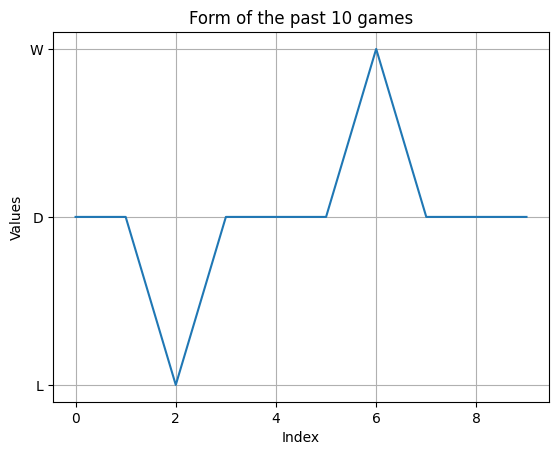

In [12]:
import matplotlib.pyplot as plt
import numpy as np

form = latest_form(ag)

category_order = ['L', 'D', 'W']

numerical_values = np.array([category_order.index(category) for category in form])

x_values_latest = range(len(form))

plt.plot(x_values_latest, numerical_values)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Form of the past 10 games')
plt.grid(True)
plt.yticks(range(len(category_order)), category_order)

plt.show()

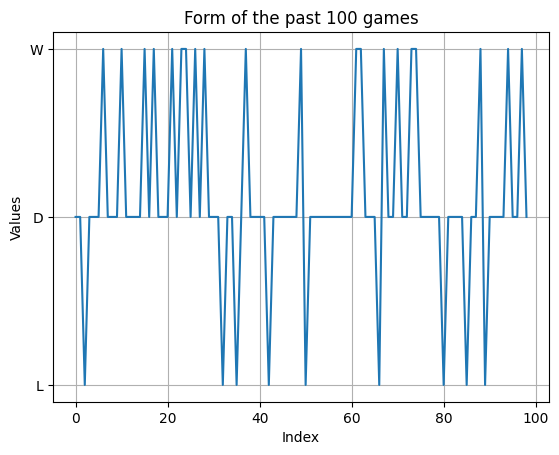

In [13]:
import matplotlib.pyplot as plt
import numpy as np

form = present_form(ag)

category_order = ['L', 'D', 'W']

numerical_values = np.array([category_order.index(category) for category in form])

x_values_latest = range(len(form))

plt.plot(x_values_latest, numerical_values)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Form of the past 100 games')
plt.grid(True)
plt.yticks(range(len(category_order)), category_order)

plt.show()

In [14]:
#crucial step - adding the form of the last 10 games here..
#will be updated after each record - so not 100% static dataset
        
def result_for_giri(row):
    if row['White'] == 'Giri, Anish':
        return 'W' if row['Res'] == '1-0' else 'L' if row['Res'] == '0-1' else 'D'
    elif row['Black'] == 'Giri, Anish':
        return 'W' if row['Res'] == '0-1' else 'L' if row['Res'] == '1-0' else 'D'
    return None

results_giri = []
last_10_results = []

for index, row in ag.iterrows():
    result = result_for_giri(row)
    if result is not None:
        results_giri.insert(0, result)
    last_10_results.append(list(results_giri[1:11]))  # copy the current state of last 10 results

ag['Last_10_Results'] = last_10_results

In [15]:
ag

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs,Last_10_Results
251,7/23/2012,"Morozevich, Alexander","Giri, Anish",2770,2696,2733,45th Biel GM,Biel SUI,D97,"Gruenfeld Defense, Russian Variation, With e4",1.0,0-1,50,[]
250,7/24/2012,"Nakamura, Hikaru","Giri, Anish",2778,2696,2737,45th Biel GM,Biel SUI,D02,"Queen Pawn Game, Symmetrical Variation",2.0,½-½,41,[W]
249,7/25/2012,"Giri, Anish","Bacrot, Etienne",2696,2713,2704,45th Biel GM,Biel SUI,E97,"King's Indian Defense, Orthodox Variation, Bay...",3.0,1-0,37,"[D, W]"
248,7/26/2012,"Giri, Anish","Wang, Hao",2696,2739,2717,45th Biel GM,Biel SUI,E83,"King's Indian Defense, Saemisch Variation, Pan...",4.0,0-1,57,"[W, D, W]"
247,7/27/2012,"Carlsen, Magnus","Giri, Anish",2837,2696,2766,45th Biel GM,Biel SUI,C42,"Russian Game, French Attack",5.0,½-½,49,"[L, W, D, W]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2/18/2023,"Nepomniachtchi, Ian","Giri, Anish",2773,2771,2772,WR Chess Masters 2023,Dusseldorf GER,A28,"English Opening, King's English Variation, Fou...",3.3,½-½,37,"[D, W, D, D, D, W, D, D, D, D]"
3,2/19/2023,"Giri, Anish","Esipenko, Andrey",2771,2723,2747,WR Chess Masters 2023,Dusseldorf GER,A45,"Indian Game, General",4.5,½-½,33,"[D, D, W, D, D, D, W, D, D, D]"
2,2/21/2023,"Aronian, Levon","Giri, Anish",2785,2771,2778,WR Chess Masters 2023,Dusseldorf GER,C67,"Spanish Game, Berlin Defense, Rio Gambit Accepted",5.1,1-0,48,"[D, D, D, W, D, D, D, W, D, D]"
1,2/23/2023,"Keymer, Vincent","Giri, Anish",2655,2771,2713,WR Chess Masters 2023,Dusseldorf GER,A20,"English Opening, King's English Variation, Gen...",7.4,½-½,39,"[L, D, D, D, W, D, D, D, W, D]"


In [16]:
ag['Elo Difference w.r.t. Anish'] = ""
for index, row in ag.iterrows():
    if row["White"] == "Giri, Anish":
        x = float(row["W ELO"]) - float(row["B ELO"])
        ag.at[index, "Elo Difference w.r.t. Anish"] = x
    elif row["Black"] == "Giri, Anish":
        x = float(row["B ELO"]) - float(row["W ELO"])
        ag.at[index, "Elo Difference w.r.t. Anish"] = x

In [17]:
ag

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs,Last_10_Results,Elo Difference w.r.t. Anish
251,7/23/2012,"Morozevich, Alexander","Giri, Anish",2770,2696,2733,45th Biel GM,Biel SUI,D97,"Gruenfeld Defense, Russian Variation, With e4",1.0,0-1,50,[],-74.0
250,7/24/2012,"Nakamura, Hikaru","Giri, Anish",2778,2696,2737,45th Biel GM,Biel SUI,D02,"Queen Pawn Game, Symmetrical Variation",2.0,½-½,41,[W],-82.0
249,7/25/2012,"Giri, Anish","Bacrot, Etienne",2696,2713,2704,45th Biel GM,Biel SUI,E97,"King's Indian Defense, Orthodox Variation, Bay...",3.0,1-0,37,"[D, W]",-17.0
248,7/26/2012,"Giri, Anish","Wang, Hao",2696,2739,2717,45th Biel GM,Biel SUI,E83,"King's Indian Defense, Saemisch Variation, Pan...",4.0,0-1,57,"[W, D, W]",-43.0
247,7/27/2012,"Carlsen, Magnus","Giri, Anish",2837,2696,2766,45th Biel GM,Biel SUI,C42,"Russian Game, French Attack",5.0,½-½,49,"[L, W, D, W]",-141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2/18/2023,"Nepomniachtchi, Ian","Giri, Anish",2773,2771,2772,WR Chess Masters 2023,Dusseldorf GER,A28,"English Opening, King's English Variation, Fou...",3.3,½-½,37,"[D, W, D, D, D, W, D, D, D, D]",-2.0
3,2/19/2023,"Giri, Anish","Esipenko, Andrey",2771,2723,2747,WR Chess Masters 2023,Dusseldorf GER,A45,"Indian Game, General",4.5,½-½,33,"[D, D, W, D, D, D, W, D, D, D]",48.0
2,2/21/2023,"Aronian, Levon","Giri, Anish",2785,2771,2778,WR Chess Masters 2023,Dusseldorf GER,C67,"Spanish Game, Berlin Defense, Rio Gambit Accepted",5.1,1-0,48,"[D, D, D, W, D, D, D, W, D, D]",-14.0
1,2/23/2023,"Keymer, Vincent","Giri, Anish",2655,2771,2713,WR Chess Masters 2023,Dusseldorf GER,A20,"English Opening, King's English Variation, Gen...",7.4,½-½,39,"[L, D, D, D, W, D, D, D, W, D]",116.0


In [18]:
ag_w = ag.drop(['Av ELO','Round','Mvs','Date','Site','Event','ECO','Opening','W ELO','B ELO'], axis=1)
ag_w

,White,Black,Res,Last_10_Results,Elo Difference w.r.t. Anish
251,"Morozevich, Alexander","Giri, Anish",0-1,[],-74.0
250,"Nakamura, Hikaru","Giri, Anish",½-½,[W],-82.0
249,"Giri, Anish","Bacrot, Etienne",1-0,"[D, W]",-17.0
248,"Giri, Anish","Wang, Hao",0-1,"[W, D, W]",-43.0
247,"Carlsen, Magnus","Giri, Anish",½-½,"[L, W, D, W]",-141.0
...,...,...,...,...,...
4,"Nepomniachtchi, Ian","Giri, Anish",½-½,"[D, W, D, D, D, W, D, D, D, D]",-2.0
3,"Giri, Anish","Esipenko, Andrey",½-½,"[D, D, W, D, D, D, W, D, D, D]",48.0
2,"Aronian, Levon","Giri, Anish",1-0,"[D, D, D, W, D, D, D, W, D, D]",-14.0
1,"Keymer, Vincent","Giri, Anish",½-½,"[L, D, D, D, W, D, D, D, W, D]",116.0


In [19]:
ag_w['Num_Result'] = ""
for index, row in ag_w.iterrows():
    
    if row["White"] == "Giri, Anish":
        if row["Res"] == '1-0':
            ag_w.at[index, "Num_Result"] = 1
        elif row["Res"] == '0-1':
            ag_w.at[index, "Num_Result"] = 0
        else:
            ag_w.at[index, "Num_Result"] = 0.5
    
    if row["Black"] == "Giri, Anish":
        if row["Res"] == '0-1':
            ag_w.at[index, "Num_Result"] = 1
        elif row["Res"] == '1-0':
            ag_w.at[index, "Num_Result"] = 0
        else:
            ag_w.at[index, "Num_Result"] = 0.5

ag_w.head(50)

,White,Black,Res,Last_10_Results,Elo Difference w.r.t. Anish,Num_Result
251,"Morozevich, Alexander","Giri, Anish",0-1,[],-74.0,1
250,"Nakamura, Hikaru","Giri, Anish",½-½,[W],-82.0,0.5
249,"Giri, Anish","Bacrot, Etienne",1-0,"[D, W]",-17.0,1
248,"Giri, Anish","Wang, Hao",0-1,"[W, D, W]",-43.0,0
247,"Carlsen, Magnus","Giri, Anish",½-½,"[L, W, D, W]",-141.0,0.5
246,"Giri, Anish","Bologan, Viktor",1-0,"[D, L, W, D, W]",-36.0,1
245,"Giri, Anish","Nakamura, Hikaru",½-½,"[W, D, L, W, D, W]",-82.0,0.5
244,"Bacrot, Etienne","Giri, Anish",0-1,"[D, W, D, L, W, D, W]",-17.0,1
243,"Giri, Anish","Carlsen, Magnus",½-½,"[W, D, W, D, L, W, D, W]",-126.0,0.5
242,"Wang, Hao","Giri, Anish",1-0,"[D, W, D, W, D, L, W, D, W]",-15.0,0


In [20]:
AG = ag_w.drop('Res', axis=1)
AG.head()

,White,Black,Last_10_Results,Elo Difference w.r.t. Anish,Num_Result
251,"Morozevich, Alexander","Giri, Anish",[],-74.0,1
250,"Nakamura, Hikaru","Giri, Anish",[W],-82.0,0.5
249,"Giri, Anish","Bacrot, Etienne","[D, W]",-17.0,1
248,"Giri, Anish","Wang, Hao","[W, D, W]",-43.0,0
247,"Carlsen, Magnus","Giri, Anish","[L, W, D, W]",-141.0,0.5


In [21]:
AG.head(50)

,White,Black,Last_10_Results,Elo Difference w.r.t. Anish,Num_Result
251,"Morozevich, Alexander","Giri, Anish",[],-74.0,1
250,"Nakamura, Hikaru","Giri, Anish",[W],-82.0,0.5
249,"Giri, Anish","Bacrot, Etienne","[D, W]",-17.0,1
248,"Giri, Anish","Wang, Hao","[W, D, W]",-43.0,0
247,"Carlsen, Magnus","Giri, Anish","[L, W, D, W]",-141.0,0.5
246,"Giri, Anish","Bologan, Viktor","[D, L, W, D, W]",-36.0,1
245,"Giri, Anish","Nakamura, Hikaru","[W, D, L, W, D, W]",-82.0,0.5
244,"Bacrot, Etienne","Giri, Anish","[D, W, D, L, W, D, W]",-17.0,1
243,"Giri, Anish","Carlsen, Magnus","[W, D, W, D, L, W, D, W]",-126.0,0.5
242,"Wang, Hao","Giri, Anish","[D, W, D, W, D, L, W, D, W]",-15.0,0


In [22]:
AG["Binarized_Form"] = None
for index, row in AG.iterrows():
    k = [1 if x == "W" else 0 if x == "L" else 0.5 for x in row["Last_10_Results"]]
    AG.at[index, "Binarized_Form"] = k


In [23]:
AG['Binarized_Form'] = AG['Binarized_Form'].apply(lambda x: [float(val) for val in x])
AG.head()

,White,Black,Last_10_Results,Elo Difference w.r.t. Anish,Num_Result,Binarized_Form
251,"Morozevich, Alexander","Giri, Anish",[],-74.0,1,[]
250,"Nakamura, Hikaru","Giri, Anish",[W],-82.0,0.5,[1.0]
249,"Giri, Anish","Bacrot, Etienne","[D, W]",-17.0,1,"[0.5, 1.0]"
248,"Giri, Anish","Wang, Hao","[W, D, W]",-43.0,0,"[1.0, 0.5, 1.0]"
247,"Carlsen, Magnus","Giri, Anish","[L, W, D, W]",-141.0,0.5,"[0.0, 1.0, 0.5, 1.0]"


In [24]:
cols = AG.drop(["Num_Result","White","Black","Last_10_Results"], axis=1)
cols

,Elo Difference w.r.t. Anish,Binarized_Form
251,-74.0,[]
250,-82.0,[1.0]
249,-17.0,"[0.5, 1.0]"
248,-43.0,"[1.0, 0.5, 1.0]"
247,-141.0,"[0.0, 1.0, 0.5, 1.0]"
...,...,...
4,-2.0,"[0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, ..."
3,48.0,"[0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, ..."
2,-14.0,"[0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, ..."
1,116.0,"[0.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, ..."


In [25]:
output_col = AG["Num_Result"].drop(AG["Num_Result"].index[:10])

In [26]:
input_col = cols.drop(cols.index[:10])

In [27]:
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(input_col['Elo Difference w.r.t. Anish'].values.reshape(-1, 1))

input_col['Normalized Difference'] = normalized_values

In [28]:
normalized_values

array([[3.06451613e-01],
       [2.10410557e-01],
       [6.01173021e-02],
       [8.79765396e-02],
       [7.03812317e-02],
       [1.31964809e-02],
       [1.77419355e-01],
       [7.99120235e-02],
       [6.74486804e-02],
       [7.69794721e-02],
       [4.76539589e-02],
       [8.21114370e-02],
       [7.11143695e-02],
       [5.86510264e-02],
       [7.03812317e-02],
       [1.09970674e-01],
       [3.73900293e-02],
       [6.01173021e-02],
       [3.25513196e-01],
       [1.59824047e-01],
       [9.53079179e-02],
       [2.55865103e-01],
       [2.63196481e-01],
       [2.82991202e-01],
       [1.40762463e-01],
       [3.51906158e-02],
       [1.67888563e-01],
       [1.28299120e-01],
       [3.51906158e-02],
       [1.28299120e-01],
       [1.67888563e-01],
       [2.35337243e-01],
       [1.73753666e-01],
       [2.14076246e-01],
       [1.76686217e-01],
       [1.24633431e-01],
       [1.64222874e-01],
       [2.54398827e-01],
       [2.51466276e-01],
       [2.45601173e-01],


In [29]:
input_col = input_col.drop(["Elo Difference w.r.t. Anish"], axis=1)

In [30]:
X = input_col
Y = output_col

In [31]:
X

,Binarized_Form,Normalized Difference
241,"[0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, 1.0, 0.5, ...",0.306452
240,"[1.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, 1.0, ...",0.210411
239,"[1.0, 1.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, ...",0.060117
238,"[0.0, 1.0, 1.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, ...",0.087977
237,"[0.5, 0.0, 1.0, 1.0, 0.0, 0.5, 1.0, 0.5, 1.0, ...",0.070381
...,...,...
4,"[0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, ...",0.074780
3,"[0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, ...",0.111437
2,"[0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, ...",0.065982
1,"[0.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, ...",0.161290


In [32]:
Y

241      1
240      1
239      0
238    0.5
237    0.5
      ... 
4      0.5
3      0.5
2        0
1      0.5
0      0.5
Name: Num_Result, Length: 242, dtype: object

In [33]:
train_size = int(250 * 0.7)

In [34]:
X_train = X[:train_size]
Y_train = Y[:train_size]

# Remaining 20% goes into the test set
X_test = X[train_size:]
Y_test = Y[train_size:]

In [35]:
print(X_test.dtypes)

Binarized_Form            object
Normalized Difference    float64
dtype: object


In [36]:
X_train

,Binarized_Form,Normalized Difference
241,"[0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, 1.0, 0.5, ...",0.306452
240,"[1.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, 1.0, ...",0.210411
239,"[1.0, 1.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, ...",0.060117
238,"[0.0, 1.0, 1.0, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, ...",0.087977
237,"[0.5, 0.0, 1.0, 1.0, 0.0, 0.5, 1.0, 0.5, 1.0, ...",0.070381
...,...,...
71,"[0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, ...",0.182551
70,"[0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, ...",0.182551
69,"[1.0, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, ...",0.182551
68,"[0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 0.5, 0.5, 0.5, ...",0.182551


In [37]:
X_train.columns

Index(['Binarized_Form', 'Normalized Difference'], dtype='object')

In [38]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert lists in 'Binarized_Form' into numpy array of type float32
X_train['Binarized_Form'] = X_train['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))

# Convert lists into a multi-dimensional numpy array and pad sequences to the same length
X_train_padded = pad_sequences(X_train['Binarized_Form'].tolist(), padding='post', dtype='float32')  # use dtype='float32'

# # Add 'Elo Difference w.r.t. Fabi' as additional features
X_train_final = np.hstack((X_train['Normalized Difference'].values.reshape(-1, 1), X_train_padded))

# Convert Y_train to float32
Y_train = Y_train.astype(np.float32)

C:\Users\User\AppData\Local\Temp\ipykernel_25516\49391738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Binarized_Form'] = X_train['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))


In [39]:
X_train_final.shape

(175, 11)

In [40]:
np.set_printoptions(threshold=np.inf)
print(X_train_final)

[[3.06451613e-01 0.00000000e+00 5.00000000e-01 1.00000000e+00
  5.00000000e-01 1.00000000e+00 5.00000000e-01 0.00000000e+00
  1.00000000e+00 5.00000000e-01 1.00000000e+00]
 [2.10410557e-01 1.00000000e+00 0.00000000e+00 5.00000000e-01
  1.00000000e+00 5.00000000e-01 1.00000000e+00 5.00000000e-01
  0.00000000e+00 1.00000000e+00 5.00000000e-01]
 [6.01173021e-02 1.00000000e+00 1.00000000e+00 0.00000000e+00
  5.00000000e-01 1.00000000e+00 5.00000000e-01 1.00000000e+00
  5.00000000e-01 0.00000000e+00 1.00000000e+00]
 [8.79765396e-02 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 5.00000000e-01 1.00000000e+00 5.00000000e-01
  1.00000000e+00 5.00000000e-01 0.00000000e+00]
 [7.03812317e-02 5.00000000e-01 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 5.00000000e-01 1.00000000e+00
  5.00000000e-01 1.00000000e+00 5.00000000e-01]
 [1.31964809e-02 5.00000000e-01 5.00000000e-01 0.00000000e+00
  1.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e-01
  1.00000000e+00

In [41]:
Y_train

241    1.0
240    1.0
239    0.0
238    0.5
237    0.5
      ... 
71     0.5
70     1.0
69     0.5
68     0.5
67     1.0
Name: Num_Result, Length: 175, dtype: float32

In [42]:
len(Y_train)

175

In [43]:
Y_train.shape

(175,)

In [44]:
def create_model():
    model = Sequential()
    model.add(Dense(units=98, activation='relu', input_dim = 11))
    model.add(Dense(units=32))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
    return model

In [45]:
model = create_model()

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 98)                1176      
                                                                 
 dense_1 (Dense)             (None, 32)                3168      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4,443
Trainable params: 4,443
Non-trainable params: 0
_________________________________________________________________


In [47]:
n_features = X_train_final.shape[1]
n_features

11

In [48]:
Y_train_encoded = pd.get_dummies(Y_train).values

In [49]:
model.fit(X_train_final, Y_train_encoded, epochs=200, batch_size=16)

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 0.9891 - accuracy: 0.5486
Epoch 2/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9869 - accuracy: 0.5486
Epoch 3/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9845 - accuracy: 0.5600
Epoch 4/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9825 - accuracy: 0.5486
Epoch 5/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9822 - accuracy: 0.5657
Epoch 6/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9797 - accuracy: 0.5600
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9786 - accuracy: 0.5657
Epoch 8/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9772 - accuracy: 0.5600
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9751 - accuracy: 0.5543
Epoch 10/200
11/11 [==============================] - 0s 1ms/step - loss: 0.9748 - accuracy: 0.5657
Epoch 11/

Epoch 83/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8994 - accuracy: 0.5943
Epoch 84/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.6000
Epoch 85/200
11/11 [==============================] - 0s 930us/step - loss: 0.8981 - accuracy: 0.6000
Epoch 86/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8962 - accuracy: 0.6057
Epoch 87/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8956 - accuracy: 0.6000
Epoch 88/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8955 - accuracy: 0.6000
Epoch 89/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8939 - accuracy: 0.6057
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.6000
Epoch 91/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8932 - accuracy: 0.6000
Epoch 92/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8918 - accuracy: 0.594

11/11 [==============================] - 0s 1ms/step - loss: 0.8400 - accuracy: 0.6057
Epoch 165/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8377 - accuracy: 0.6229
Epoch 166/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8394 - accuracy: 0.6114
Epoch 167/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.6400
Epoch 168/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8367 - accuracy: 0.6229
Epoch 169/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8380 - accuracy: 0.6400
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.6114
Epoch 171/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8335 - accuracy: 0.6343
Epoch 172/200
11/11 [==============================] - 0s 1ms/step - loss: 0.8307 - accuracy: 0.6514
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 0.8319 - accuracy: 0.6229
Epoc

In [50]:
# Convert 'Elo Difference w.r.t. Fabi' to float32
X_test['Normalized Difference'] = X_test['Normalized Difference'].astype(np.float32)

# Convert lists in 'Binarized_Form' into numpy array of type float32
X_test['Binarized_Form'] = X_test['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))

# Convert lists into a multi-dimensional numpy array and pad sequences to the same length
X_test_padded = pad_sequences(X_test['Binarized_Form'].tolist(), padding='post', dtype='float32')  # use dtype='float32'

# Add 'Elo Difference w.r.t. Fabi' as additional features
X_test_final = np.hstack((X_test['Normalized Difference'].values.reshape(-1, 1), X_test_padded))

# Convert Y_train to float32
Y_test = Y_test.astype(np.float32)

C:\Users\User\AppData\Local\Temp\ipykernel_25516\980336580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Normalized Difference'] = X_test['Normalized Difference'].astype(np.float32)
C:\Users\User\AppData\Local\Temp\ipykernel_25516\980336580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Binarized_Form'] = X_test['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))


In [51]:
X_test

,Binarized_Form,Normalized Difference
66,"[1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 0.5, ...",0.182551
65,"[0.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, ...",0.182551
64,"[0.5, 0.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, ...",0.182551
63,"[0.5, 0.5, 0.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, ...",0.335777
62,"[0.5, 0.5, 0.5, 0.0, 1.0, 0.5, 0.5, 1.0, 0.5, ...",0.175220
...,...,...
4,"[0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, ...",0.074780
3,"[0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, ...",0.111437
2,"[0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, ...",0.065982
1,"[0.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, ...",0.161290


In [52]:
result = model.predict(X_test_final)

3/3 [==============================] - 0s 0s/step


In [53]:
np.set_printoptions(threshold=np.inf)
print(result)

[[0.07642466 0.7270224  0.19655295]
 [0.27841222 0.3727701  0.34881762]
 [0.13408805 0.6252677  0.24064428]
 [0.1144328  0.6567992  0.22876804]
 [0.28502452 0.5435404  0.17143501]
 [0.12253141 0.56095785 0.31651077]
 [0.17312713 0.73442566 0.09244711]
 [0.2253539  0.29380196 0.4808441 ]
 [0.04907584 0.6359534  0.3149707 ]
 [0.13047002 0.567349   0.30218104]
 [0.07843601 0.56479424 0.35676968]
 [0.12470964 0.64412403 0.23116635]
 [0.19209696 0.68556374 0.12233933]
 [0.26736286 0.55796003 0.17467706]
 [0.21925017 0.59047127 0.19027857]
 [0.18225347 0.58228993 0.23545657]
 [0.13725628 0.58479    0.2779538 ]
 [0.17727502 0.4534297  0.3692953 ]
 [0.09638073 0.76766866 0.13595064]
 [0.20985094 0.49117413 0.29897496]
 [0.2550082  0.556915   0.18807675]
 [0.0988479  0.56208605 0.33906612]
 [0.19729435 0.632611   0.1700947 ]
 [0.13233837 0.3229608  0.5447008 ]
 [0.10385228 0.7826488  0.11349894]
 [0.26139346 0.40649664 0.33210984]
 [0.14546694 0.6989259  0.15560718]
 [0.2517675  0.5397012  0.20

In [54]:
# Get the indices of the maximum probabilities
predicted_classes = np.argmax(result, axis=1)

# Create a mapping of class indices to labels
class_index_to_label_mapping = {0: 0, 1: 0.5, 2: 1}

# Map the predicted class indices to labels
predicted_labels = [class_index_to_label_mapping[i] for i in predicted_classes]

print(predicted_labels)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0, 0.5, 0.5, 0, 0.5, 0.5, 1, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [55]:
predicted_classes

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [56]:
print(Y_test.isna().any())

False


In [57]:
Y_test.head(50)

66    0.0
65    0.5
64    0.5
63    0.5
62    1.0
61    1.0
60    0.5
59    0.5
58    0.5
57    0.5
56    0.5
55    0.5
54    0.5
53    0.5
52    0.5
51    0.5
50    0.0
49    1.0
48    0.5
47    0.5
46    0.5
45    0.5
44    0.5
43    0.5
42    0.0
41    0.5
40    0.5
39    0.5
38    0.5
37    1.0
36    0.5
35    0.0
34    0.5
33    0.5
32    0.0
31    0.5
30    0.5
29    0.5
28    1.0
27    0.5
26    1.0
25    0.5
24    1.0
23    1.0
22    0.5
21    1.0
20    0.5
19    0.5
18    0.5
17    1.0
Name: Num_Result, dtype: float32

In [58]:
Y_test = (Y_test).astype(int) 
predicted_labels = [int(label) for label in predicted_labels]
print('Accuracy: ', accuracy_score(Y_test, predicted_labels))

Accuracy:  0.7164179104477612
